
 # Objetivo del laboratorio
 El objetivo de la presenta práctica es conocer el estándar de simulación de circuitos [SPICE](http://bwrcs.eecs.berkeley.edu/Classes/IcBook/SPICE) y realizar pequeñas simulaciones en corriente continua con el mismo. SPICE es una forma elegante y sencilla de codificar circuitos eléctricos de manera que puedan ser procesados por un ordenador. Mediante un sencillo lenguaje podemos definir resistencias, fuentes de alimentación, etc., las conexiones entre ellos y los resultados que deseamos obtener.

 # El estándar SPICE
 **SPICE** es una abreviabiación de *Simulation Program with Integrated Circtuit Emphasis*.
 Se trata básicamente de un método estándar para describir circuitos usando texto plano en
 lugar de una representación gráfica (o *esquemática*). A esta descripción en texto se
 la llama también **netlist** y básicamente se corresponde con la *lista* de los componentes del circuito y cómo estos están conectados entre sí, es decir, de los nodos de unión.
 Los ficheros netlist pueden tener extensiones `.cir`, `.net`, `.ckt`, ó `.sp` y es muy común encontrárselos con cualquiera de estas.

 Existen en el mercado muchas variantes (intérpretes) de Spice, aunque el original fue descrito
 en la Universidad de Berkeley. En la lista de intérpretes de Spice tenemos desde esfuerzos y proyectos comerciales hasta *open source* y regidos por distintas comunidades de usuarios y programadores.

> **Pregunta:** Enumera todos los intérprete de Spice que puedas encontrar. Crea una tabla en Markdown con varias columnas (para el nombre, fabricante, versión actual, licencia y alguna característica sobresaliente). Aquí tienes un ejemplo del que puedes partir y seguir completando:

| `Intérprete` | `Licencia` | `Fabricante`                             | `Características`  |
| :--------- | :------- | :------------------------------------------- | :---------------- |
| ---------- | ------------- | -------------------------------------------- | ------------------ |
| Ahkab      | GPL      | Giuseppe Venturini                           | Basado en Python |
| LTspice    | Freeware | Mike Engelhardt                              | Basado en Python |
| PSpice     | Propiedad| Dennis Fitzpatrick/Cadence Design Systems    | Basado en C/C++  |
| Ngspice    | BSD      | Open project                                 | Basado en C, multiplataforma      |
| Macspice   | BSD      | Charles D. H. Williams                       | Para Mac OS X    |
| OrCAD      | Propiedad| Cadence Design Systems                       | Basado en C/C++  |
| TINA       | Propiedad| DesignSoft                                   | Multiplataforma  |


 > **Pregunta:** ¿Qué comparación puedes efectuar entre C y Spice como estándares (lenguajes) y sus respectivas implementaciones en software? ¿Qué implementaciones reales (compiladores) del lenguaje C conoces? 

Mientras que C es un lenguaje compilado, Spice es interpretado. Es por esto que el software utilizado para programar en C ha de ser compilador, es decir, que previo paso a ser ejecutado, el software que utilicemos traducirá nuestro programa a lenguaje máquina, creando así un ejecutable legible por una máquina de manera directa. Spice por su parte no necesita de dicho paso ya que el programa que lo ejecute interpretará cada instrucción a medida que la va leyendo.
 
En la siguiente tabla se muestra una relación de ejemplos de compiladores C para diferentes sistemas operativos: 

| `Compilador`      | `Sistema Operativo` | `Licencia`                  | `Fabricante`                           | `Observaciones`           |
| :--------------- | :----------------- | :------------------------- | :------------------------------------ | :----------------------- |
| --------------- | ------------------- | ------------------------- | ------------------------------------ | ----------------------- |
| Dev C++         | Windows           | GPL                       | Colin Laplace (Bloodshed Software)   | Basado en Object Pascal |
| AppCode         | Mac OS            | Trialware                 | JetBrains                            |                         |
| CLion           | Multiplataforma   | Propiedad                 | JetBrains                            |                         |
| KDevelop        | Multiplataforma   | GPL                       | Milian Wolff                         | Programado en C++       |     
| Eclipse         | Multiplataforma   | EPL                       | Eclipse Foundation                   | Programado en Java      |
| Code::Blocks    | Multiplataforma   | GPL                       | The Code::Blocks team                | Programado en C++       |

 ## Elementos de un netlist
 Como acabamos de comentar, un netlist se corresponde con la codificación de los elementos electrónicos de un circuito y las uniones entre los mismos. Veamos con más concreción qué partes y secciones lo componen.

 ## Comentarios

 La primera línea de un netlist se corresponderá siempre con un comentario. A partir de esta línea se pueden introducir más comentarios pero tienen que ir siempre precedidos de un `*`. Ejemplo:
 
 ```spice
 Mi primer circuito
 * Otro comentario
 * más comentarios
 *
 ```

 ## Dispositivos básicos de un circuito
 Los elementos de un netlist son los mismos que encontramos en cualquier circuito eléctrico sencillo,
 tales como resistencias, **condensadores**, **bobinas**, **interruptores**, **hilos** y **fuentes** de alimentación.
 Para distinguir uno de otro, se reserva una letra característica: `V` para fuentes de alimentación, `R` para resistencias, `C` para condensadores y `L` para bobinas. También es posible usar estas letras en su versión en minúscula (`r`, `v`, `c`, `l`, etc.).
 Después de esta letra característica se puede sufijar cualquier texto para diferenciar un elemento de otro (números, letras, palabras, etc.). Ejemplo:

 ```
 * Una resistencia
 R1
 *  Otra resistencia
 R2
 * Fuente de alimentación
 V
 * Un condensador
 Cprincipal
 ```

 ## Conexiones
 A continuación de indicar el elemento eléctrico, tenemos que informar a Spice cuáles
 son los puntos de unión tanto a un lado como al otro del elemento.
 Así es como Spice sabe qué está conectado a qué: porque comparten un **punto**
 (o **nodo**, aunque este término se reserva sobretodo a uniones de más de dos elementos)
 que hemos señalizado correctamente. Para nombrar nodos, lo mejor es emplear una
 numeración secuencial: 0...n. **La enumeración de los puntos de unión es completamente
 a nuestro criterio**.

 ```
 * Una resistencia
 * entre cables 0 y 1
 R1 0 1
 ```

 **Sólo es necesario seguir un criterio**: en el caso de una
 fuente de alimentación, el nodo que pondremos primero será
 aquel que está más cerca del *borne* positivo. Ejemplo:

 ```spice
 * Para una fuente indicamos primeramente conexión a nodo positivo.
 v 2 3 type=vdc vdc=1
 ```
 
En el *caso de LTspice* no es necesario indicar los parámetros `type=vdc` y `vdc=X`, sino que si no se especifica nada, se supone que el último valor es el del voltaje a corriente continua:

```spice
* Especificación de una fuente de alimentación de 10 V en corrient continua en el caso de LTspice
v 0 1 10
```

Aquí tienes un ejemplo gráfico de los componentes comentados justo arriba (resistencia y voltaje):

![](https://raw.githubusercontent.com/pammacdotnet/spicelab/master/resistencia%20y%20pila%20con%20nodos.svg?sanitize=true)

 ## Unidades en SPICE

 Las unidades de las magnitudes características del circuito son siempre [unidades
 del Sistema Internacional](https://en.wikipedia.org/wiki/SI_electromagnetism_units) y no es necesario indicarlo explícitamente en el netlist.

 La forma de especificar múltiplos de estas cantidades es añadiendo una letra.
 Básicamente las que nos interesan y las que suelen aparecer mayoritariamente son `k` para "kilo-," `m` para "mili?" y `u` para "micro?".

 > **Pregunta:** Crea una tabla en Markdown con todos los prefijos de múltiplos que puedas, su abreviatura y su equivalencia numérica.
A continuación se muestra la tabla solicitada, encontrándose en las tres primeras columnas los múltiplos, complementado con los submúltiplos en las siguientes tres columnas:

| `Prefijo`      | `Simbolo` | `Equivalencia numérica` | `Prefijo`      | `Simbolo` | `Equivalencia numérica` |
| :------------: | :-------: | :---------------------: | :------------: | :-------: | :---------------------: |
| ------------ | ------------ | ------------------------- | ------------ | ------------ | --------------------- |
| deca         | da      | $10^{1}$              | deci         | d       | $10^{-1}$ 
| hecto        | h       | $10^{2}$              | centi        | c       | $10^{-2}$ 
| kilo         | k       | $10^{3}$              | mili         | m       | $10^{-3}$ 
| mega         | M       | $10^{6}$              | micro        | µ       | $10^{-6}$ 
| giga         | G       | $10^{9}$              | nano         | n       | $10^{-9}$ 
| tera         | T       | $10^{12}$             | pico         | p       | $10^{-12}$ 
| peta         | P       | $10^{15}$             | femto        | f       | $10^{-15}$ 
| exa          | E       | $10^{18}$             | atto         | a       | $10^{-18}$ 
| zetta        | Z       | $10^{21}$             | zepto        | z       | $10^{-21}$ 
| yotta        | Y       | $10^{24}$             | yocto        | y       | $10^{-24}$ 


 En el caso de las fuentes de alimentación hemos de especificar si se trata de corriente contínua (`vdc`) o alterna (`ac`).

 ```
 * Una resistencia de 5 Ohmios
 R2 1 0 5
 * Una pila de 10 Voltios (continua)
 V1 1 0 type=vdc vdc=10
 * Una resistencia de 5 kΩ
 RX 2 4 5k
 ```

 > **Pregunta**: ¿qué unidades del Sistema Internacional relacionadas con la asignatura –y los circuitos en general– conoces? Responde aquí mismo en una celda de Markdown con una tabla.

De las 7 unidades básicas del Sistema Internacional, las relacionadas principalmente con el temario visto hasta ahora son:

| `Unidad`      | `Simbolo` | `Magnitud` |
| :------------ | :------- | :--------------------- | 
| ------------ | ------------ | ------------------------- | 
| segundo | s | tiempo|
| metro | m | longitud|
| kilogramo | kg | masa|
| amperio | A | corriente eléctrica|

Dentro de la unidades suplementarias: 

| `Unidad`      | `Simbolo` | `Magnitud` |
| :------------ | :------- | :--------------------- | 
| ------------ | ------------ | ------------------------- |
| radián | rad | ángulo plano |

En lo que concierne a las unidades derivadas (aquellas que matemáticamente se pueden reformular expresándose en base a las unidades básicas) las utilizadas son:

| `Nombre`      | `Simbolo` | `Cantidad física` | `Expresión en unidades básicas` |
| :------------ | :------- | :--------------------- | :--------------------------------- |
| ------------ | ------------ | ------------------------- | ---------------------------------- |
| hercio | Hz | frecuencia | $$s^{-1}$$ |
| newton | N | fuerza | $$m kg s^{-2}$$ |
| julio | J | energía | $$m^{2} kg s^{-2}$$ |
| vatio | W | potencia | $$m^{2} kg s^{-3}$$|
| culombio | C | carga electrica | $$s A$$ |
| voltio | V | tensión eléctrica/diferencia potencial | $$m^{2} kg s^{-3} A^{-1}$$ |
| faradio | F | capacitancia | $$m^{-2} kg^{-1} s^{4} A^{2}$$ | 
| ohmio | Ω | resistencia eléctrica | $$m^{2} kg s^{-3} A^{-2}$$ | 
| weber | Wb | flujo magnético | $$m^{2} kg s^{-2} A^{-1}$$ | 
| tesla | T | campo magnético (densidad de flujo magnético) | $$kg s^{-2} A^{-1}$$ | 

 ## Valores iniciales

 Aparecen justo al final de la definición del componente (`ic`). Suelen aplicarse principalmente con condensadores.

 ```
 * Una condensador inicialmente no cargado
 c 1 0 1u ic=0
 ```

 ## Fin del circuito

 El fin de la descripción de un netlist se especifica mediante el
 comando `.end`.

 ```spice
 * Mi primer circuito
 V 1 0 vdc=10 type=vdc
 R 1 0 5
 * Fin del circuito
 .end
 ```


 ## Comandos SPICE para circuitos en corriente continua

 Además de la descripción del circuito, hemos de indicar al intérprete de Spice qué
 tipo de análisis queremos realizar en sobre el mismo y cómo queremos presentar
 la salida de la simulación. Los comandos en Spice empiezan por un `.` y suelen
 escribirse justo al final del circuito, pero antes del comando `.end`.

 ```
  Mi primer circuito
 * Aquí van los componentes
 R 1 0 6k
 ...
 * Comandos
 .op
 ...
 * Fin del circuito
 .end
 ```

 > **Pregunta**: Hasta lo que has visto del lenguaje Spice, ¿dentro de qué tipo o conjunto de lenguajes encajaría? ¿Funcionales? ¿Específicos de dominio? ¿Procedurales? ¿Estructurados? ¿Orientado a Objetos ¿Funcionales? Justifica tu respuesta. 

 Encajaría el lenguaje Spice dentro de los lenguajes específicos de dominio ya que fue creado y se usa con un objetivo concreto (la simulación de circuitos), característica fundamental de este tipo de lenguajes. 

 Veamos los principales comandos de simulación:

 - `.op` es el comando más sencillo que podemos emplear en. Devuelve el voltaje e intensidad en cada ramal y componente del circuito. Este comando no necesita parámetros.
 - `.dc` es uy parecido al comando `.op` pero nos permite cambiar el valor del voltaje de una fuente de alimentación en pasos consecutivos entre el valor A y el valor B.
 En el caso de que la fuente tuviera asignada ya un valor para su voltaje, este sería ignorado. Ejemplo:


 ```spice
 * Variamos el valor del voltaje
 * de la fuente "v" de 1 a 1000
 * en pasos de 5 voltios
 v 1 0 type=vdc vdc=10
 .dc v 1 start=1 stop=1000 step=20
 v2a 2 4 type=vdc vdc=9
 * Igual para v2a. Se ignora su voltaje de 9V
 .dc v2a start=0 stop=10 step=2
 ```

 - El comando `.tran` realiza un análisis en el tiempo de los parámetros del
 circuito. Si no se emplea la directiva `uic` (*use initial conditions*) o esta es igual a cero, este análisis se realiza desde el punto estable de funcionamiento del circuito hasta un tiempo `tfinal`.
 y en intervalos `tstep`. Si empleamos un varlor distinto para parámetro `uic`,
 entonces se hará uso de las condiciones iniciales definidas para cada componente
  (típicamente `ic=X` en el caso de los condensadores, que da cuenta de la carga incial que estos pudieran tener).


 ```
 * Hacemos avanzar el tiempo entre
 * tinicial y tfinal en pasos tstep
 .tran tstart=X tstop=Y tstep=Z uic=0/1/2/3
 ```

 `X`, `Y` y `Z` tienen, evidentemente unidades de tiempo en el S.I. (segundos).

 > **Pregunta**: El parámetro `uic` puede tener varios valores y cada uno significa una cosa. Detállalo usando un celda Markdown y consultando la [documentación de Ahkab](https://buildmedia.readthedocs.org/media/pdf/ahkab/latest/ahkab.pdf).

UIC (Use Initial Conditions), parámetro usado para establecer unos valores iniciales en el análisis de tipo .tran que puede tener los siguientes valores:

 
| `Valor`   | `Significado` | 
| --------- | ------------ | 
| 0 | Todos los voltajes y corrientes a través de las diferentes fuentes serán consideradas 0 en el tiempo  t = tstart |
| 1 | En el momento t = start serán considerados como valores los obtenidos en el último análisis .op |
| 2 | al igual que con el valor 1, si uic = 2, el status en t = tstart será el resultado del análisis .op, sin embargo en este caso, en el análisis .op se colocan los valores de las corrientes a traves de voltajes e inductores en condensadores especificado en su valor ic |
| 3 | El usuario provee la directiva .ic en el netlist |


 ## Intérprete SPICE que vamos a usar: Ahkab
 Tras un estándar siempre hay una o varias implementaciones. Ahkab no deja de ser una implmentación más en Python del estándar Spice.
 > **Pregunta:** Comenta las distintas implementaciones de lenguajes y estándares que conozcas. Hazlo usando una tabla en Markdown. [Aquí](https://www.markdownguide.org/extended-syntax/#tables) tienes un poco de ayuda (aunque antes ya se ha puesto el ejemplo de una tabla).
 
| `Lenguaje`   | `Estandar`   | 
| ------------ | ------------ | 
| Java         |    Spring, JWt, Google Web Toolkit    |
| Python       |    Django, Pyramid, CherryPy, Bootle    |
| C++          |    Drogon, CppCMS, Poco    |
| C#           |    ASP.NET         |
| JavaScript   |    Angular.JS, Reac.Js, Vue.Js, Node.Js, Polymer.Js      |     
| PHP          |    Laravel,Symfony, Codelgniter       |
| Swift        |    Vapor, Realm       | 
| Perl         |    Catalyst, Mason, Maypole   |
| Ruby         |    Ruby on Rails, Sinatra, Celluloid        |

 > **Pregunta:** Describe brevemente este software (creador, objetivos, versiones, licencia, características principales, dependencias, etc.).

Ahkab es un software basado en el lenguaje Spice y creado por Giuseppe Venturini, cuyos principales objetivos con este proyecto, y a su vez lo que lo caracteriza, eran permitir al diseñador del circuito ver claramente lo que ocurre de manera interna en los circuitos durante las simulaciones a través de los diferentes algoritmos que implementa y que el usuario tiene disponibles para ver, analizar y modificar si fuese necesario gracias al ser de código abierto. Otro de sus objetivos es que permite experimentar mediante la implementación de algoritmos ajenos al proyecto original y publicados en artículos, siendo el usuario el que tiene que crear el código de ese algoritmo y pudiendo ser incluido en el proyecto original previa comunicación con los autores con anticipación. Siendo estos sus dos principales objetivos, el autor espera que los usuarios se diviertan implementando y simulando circuitos usando este software
Cuenta con un repositorio de GitHub, donde se puede ver el desarrollo que ha ido teniendo a lo largo del tiempo con sus diferentes versiones, comenzando con la v0.10 en mayo del 2014, y creando subsecuentes hasta en 8 ocasiones (haciendo un total de 9 versiones) que solucionaban bugs, mejoraban y documentaban el código inicial. Cuenta con Licencia GPL2 (GNU General Public License), característico de todo software libre y de código abierto disponible para que el usuario lo pueda utilizar, estudiar, compartir y modificar.
Las dependencias básica y obligatorioas son: numpy, scipy, sympy y tabulate. También altamente recomendado: matplotlib y nose.


 # Trabajo práctico
 Muy bien, ahora toca definir circuitos y ejecutar simulaciones sobre los mismos gracias a Ahkab.
 ## Instalación de bibliotecas necesarias
 Si estás utilizando Anaconda, asegúrate de tener su entorno activado:
 
 ```cmd
 C:\> conda activate base (en el caso de Windows)
 ```
 ó

 ```bash
 $ source /usr/local/Caskroom/miniconda/base/bin/activate (en el caso de macOS)
 ```

En el caso de Windows tienes que tener en el PATH el directorio donde se encuentre el comando `conda` (visita la sección de [Environment Variables](https://superuser.com/questions/949560/how-do-i-set-system-environment-variables-in-windows-10) del [Panel de Control](https://www.digitalcitizen.life/8-ways-start-control-panel-windows-10)). Si has instalado Anaconda con [esta opción](https://docs.anaconda.com/_images/win-install-options.png) marcada, ya no tienes que preocuparte por ello. 

En el caso de usar Visual Studio Code, este puede encontrar automáticamente la distintas distribuciones de Python que tengamos instaladas y si abrimos un terminal, este se adaptará automáticamente al entorno Python que hayamos seleccionado. 

![](https://raw.githubusercontent.com/microsoft/vscode-python/main/images/InterpreterSelectionZoom.gif)

Ahora ya puedes instalar Ahkab:

 ```
 (base) $ pip install ahkab
 ``` 

También puedes instalar Ahkab directamente desde este mismo notebook:


In [4]:
!pip install ahkab


 Como siempre, una vez instalado cualquier framework para Python, ya lo podemos utilizar, tanto desde el [REPL](https://en.wikipedia.org/wiki/Read–eval–print_loop) como desde un entorno Jupyter (Jupyter, [Jupyterlab](http://jupyterlab.readthedocs.io/en/stable/), VS Code o nteract). Recuerda que para usar el kernel Python (que viene con Anaconda) desde nteract debes seguir las instrucciones que se indican en su [documentación oficial](https://nteract.io/kernels). 

Como vamos a pintar algunas gráficas, necesitamos instlar [matplotlib](https://matplotlib.org). Al igual que con Ahkab, esto lo podemos hacer directamente desde este mismo notebook. Si hemos usado Anaconda: 

In [5]:
!conda install -y -c conda-forge matplotlib

Solving environment: ...working... done

# All requested packages already installed.



In [157]:
import pylab as plt
import ahkab

 > **Pregunta:** ¿Qué es y para qué sirve PyLab?
 
 PyLab es un módulo que incluye partes del paquete matplotlib para plotear (matplotlib.pyplot) las gráficas y partes del paquete numpy para para la parte matemática.
 

 ## Circuitos sencillos para trabjar con la ley de Ohm:

 La *mal llamada* ley de Ohm reza que el voltaje (la *energía por unidad de carga*) que se disipa en un tramo de un circuito eléctrico es equivalente a la intensidad ($I$) de la corriente (es decir, cuántos electrones circulan por unidad de tiempo) por la resistencia del material ($R$) en el que está desplazándose dicha corriente. Matemáticamente:

 $$
 V = I\cdot R
 $$

 > **Pregunta:** comprueba que la ecuación anterior está ajustada a nivel dimensional, es decir, que la naturaleza de lo que está a ambos lados del signo igual es la misma. Realiza este ejercicio con LaTeX en una celda Markdown.
 
 Dada la ecuación anterior y sabiendo que la intensidad es de por si una unidad básica del Sistema Internacional, y que el voltaje y la resistencia en unidades básicas del Sistema Internacional se expresan como: 
 $$
 [I] = A =  A^{1}
 $$
 $$
 [V] = m^{2} kg s^{-3} A^{-1}
 $$
 $$
 [R] = m^{2} kg s^{-3} A^{-2}
 $$
 Sustituyendo en la *mal llamada* ley de Ohm:
 $$
 m^{2} kg s^{-3} A^{-1} = Am^{2} kg s^{-3} A^{-2}
 $$
 $$
 m^{2} kg s^{-3} A^{-1} = A^{1}m^{2} kg s^{-3} A^{-2}
 $$
 Aplicando la propiedad de las potencias con misma base, en este caso los amperios:
 $$
 m^{2} kg s^{-3} A^{-1} = m^{2} kg s^{-3} A^{-1}
 $$


 Comencemos con el circuito más sencillo posible de todos:

 ![](https://raw.githubusercontent.com/pammacdotnet/spicelab/master/primer%20circuito.svg?sanitize=true)

 Vamos a escribir su contenido (componentes o *netlist*) en disco con el nombre `circuito sencillo.sp`. Esto lo podemos lograr directamente y en tiempo real desde una celda de Jupyter gracias a los *comandos mágicos* de este entorno de programación literaria. En concreto vamos a utilizar `%%writefile` que guarda los contenidos de una celda como un fichero. 

In [158]:
%%writefile "circuito sencillo.sp"
* Este es un circuito sencillo
r1 1 0 100
v1 0 1 type=vdc vdc=9
.op
.dc v1 start=0 stop=9 step=1
.end


Overwriting circuito sencillo.sp


Ahora vamos a leer su descripción con Ahkab, interpretar y ejecutar las simulaciones que en él estén descritas.

In [160]:
circuito_y_análisis = ahkab.netlist_parser.parse_circuit('circuito sencillo.sp')

 Separamos la información del netlist (componentes) de los análisis (uno de tipo `op` y otro de tipo `dc`):

In [161]:
circuito = circuito_y_análisis[0]
análisis_en_netlist = circuito_y_análisis[1]
lista_de_análisis = ahkab.netlist_parser.parse_analysis(circuito, análisis_en_netlist)
print(lista_de_análisis)


[{'type': 'op', 'guess': True, 'x0': None}, {'type': 'dc', 'source': 'v1', 'start': 0.0, 'stop': 9.0, 'step': 1.0, 'sweep_type': 'LIN'}]


> **Pregunta:** ¿qué tipo de estructura de Python es `lista_de_análisis`? Diccionario dentro de lista_de_análisis

`lista_de_análisis` como su propio nombre indica tiene el tipo de estructura de lista, que a su vez cada uno de los dos elementos que la forman es un diccionario el cual contiene una serie de elementos del tipo clave:valor. 


 Las simulaciones que implican listas de datos (`.dc`, `.tran`, etc.) necesitan de un fichero temporal (`outfile`)
 donde almacenar los resultados. Para ello tenemos que definir la propiedad `outfile`.

In [162]:
lista_de_análisis[1]['outfile'] = "simulación dc.tsv"


 > **Pregunta:** escribe el código Python necesario para identificar qué análisis de `lista_de_análisis`
 son de tipo `dc` ó `tran` y sólo añadir la propiedad `outfile` en estos casos.
Aquí tenéis un post de Stackoverflow con algo de [ayuda](https://stackoverflow.com/questions/49194107/how-to-find-index-of-a-dictionary-key-value-within-a-list-python).
 Un poco más de ayuda: el siguiente código (sí, una única línea) devuelve el índice de la simulación que es de tipo `dc`. Para simplificar un poco el ejercicio, suponed que, como máximo, habrá un análisis de tipo `tran` y/o `dc`.

In [163]:
numero = [i for i, d in enumerate(lista_de_análisis) if "dc" or "tran" in d.values()][0] 
lista_de_análisis[numero]['outfile'] = "simulación.tsv"


En el codigo expresado en la celda anterior se asignará a la variable número la posición del análisis de tipo `dc` ó `tran` dentro de la lista. Tras obtener su posición, el programa irá a ese lugar dentro del array de la `lista_de_análisis` y con la propiedad `outfile` exportará la simulación al archivo de nombre establecido como "simulación.tsv"

Una vez que ya hemos separado netlists de simulaciones, ahora ejecutamos las segundas (¡todas a la vez!) gracias al método `.run` de Ahkab: 

In [164]:
resultados = ahkab.run(circuito, lista_de_análisis)

Starting op analysis:
Calculating guess: skipped. (linear circuit)
Solving...   done.
Solving...   done.
Difference check within margins.
(Voltage: er=0.001, ea=1e-06, Current: er=0.001, ea=1e-09)
Starting DC analysis:
Solving...  done


### Resultados de la simulación `.dc`
Imprimimos información sobre la simulación de tipo `.dc`:

In [165]:
print(resultados['dc'])

<DC simulation results for '* este es un circuito sencillo' (netlist circuito sencillo.sp). LIN sweep of V1 from 0 to 9 V. Run on 2021-01-06 20:25:19, data file simulación dc.tsv>


 Veamos qué variables podemos dibujar para el caso del análisis `dc`.

In [166]:
print(resultados['dc'].keys())

['V1', 'V1', 'I(V1)']


Y ahora graficamos el resultado del análisis anterior. Concretamente vamos a representar el voltaje en el borne 1 (`V1`) con respecto a la intensidad del circuito (`I(V1)`).

Text(0, 0.5, 'Intensidad (I)')

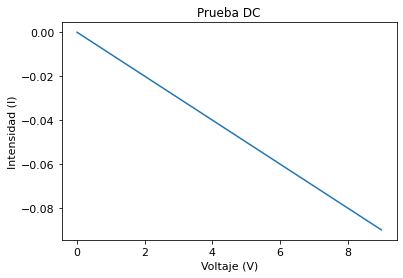

In [177]:
figura = plt.figure()
plt.title("Prueba DC")
plt.plot(resultados['dc']['V1'], resultados['dc']['I(V1)'], label="Voltaje (V1)")
plt.xlabel("Voltaje (V)")
plt.ylabel("Intensidad (I)")

> **Pregunta:** comenta la gráfica anterior… ¿qué estamos viendo exactamente? Etiqueta los ejes de la misma convenientemente. Así como ningún número puede *viajar* solo sin hacer referencia a su naturaleza, ninguna gráfica puede estar sin sus ejes convenientemente etiquetados. Algo de [ayuda](https://matplotlib.org/3.1.0/gallery/pyplots/fig_axes_labels_simple.html). ¿Qué biblioteca estamos usando para graficar? Una [pista](https://matplotlib.org).

En la gráfica previa se puede observar la intensidad del circuito en función de la resistencia previamente establecida en los parámetros del netlist (100 Ω) voltaje de la pila, el cual va cambiando (aumentando) tal y como establecimos en los parámetros del análisis .dc en un rango de 0 a 9 voltios en pasos de +1 voltio, siendo el signo del eje vertical (Intensidad) indicador de la dirección de la corriente

 ### Resultados de la simulación `.op` 
 El método `.results` nos devuelve un diccionario con los resultados de la simulación.

In [178]:
print(resultados['op'].results)

{V1: -9.0, I(V1): -0.09}


 > **Pregunta:** justifica el sencillo resultado anterior (análisis `op`). Repite el cálculo con Sympy, atendiendo con mimo a las unidades y al formateo de los resultados (tal y como hemos visto en muchos otros notebooks en clase).

El resultado anterior nos indica el voltaje en el punto 1 (V1) que son 9 voltios, y la intensidad resultante en ese punto aplicando la ley de Ohm en base a ese voltaje y una resistencia establecida de 100 ohmios. 
$$ I = \frac {V}{Ω} = \frac{9V}{100Ω} = 0.09A$$
 

In [180]:
from sympy.physics.units.systems import SI
from sympy.physics.units import volt, ohm, ampere, convert_to
from sympy import solve, symbols, Eq, sympify

V = 9 * volt
R = 100 * ohm
I=symbols("Intensidad")

ley_ohm = Eq(I, V/R)
Intensidad_v1 = solve(ley_ohm, I)

resultado_intensidad = sympify(Intensidad_v1[0])
convert_to(resultado_intensidad, ampere).n()


0.09*ampere

## Resolución del mismo circuito pero con LTspice
¿Cómo? ¿Es esto posible? ¿Desde Jupyter? Sí!!! Pero primero, por comodidad, deberíamos crear un alias del comando que apunte a nuestro ejecutable. Además, con un poco de inteligencia, podemos adelantarnos al hecho de si estamos en Windows o macOS:

In [181]:
import platform
%alias lts /Applications/LTspice.app/Contents/MacOS/LTspice -ascii -b
if platform.system() == "Windows":
    %alias lts "C:\Program Files\LTC\LTspiceXVII\XVIIx64.exe" -ascii -b

**Pregunta**: ¿Qué significan las opciones `-b` y `-ascii`? Algo de ayuda [aquí](http://ltwiki.org/LTspiceHelp/LTspiceHelp/Command_Line_Switches.htm).

-ascii: para el uso de archivos .raw escritos en ascii

-b: Procesamiento por lotes, para generar el archivo .raw con los resultados del circuito

También tenemos que cambiar ligeramente la sintaxis. Ejecuta esta línea para que se escriba el fichero siguiente. Para LTspice, vamos a reservar la extensión `.net`:

In [182]:
%%writefile "circuito sencillo.net"
* Este es un circuito sencillo adaptado para LTspice
r1 1 0 100
v1 0 1 9
.op
* Comentamos el análisis .dc para centrarnos primero en el .op
* .dc v1 1 10 
.end

Overwriting circuito sencillo.net


Ejecutamos LTspice con el circuito (de la misma manera que antes habíamos hecho con Ahkab).

In [183]:
lts "circuito sencillo.net"

Veamos el contenido de la simulación.

In [184]:
%pycat circuito sencillo.log

Circuit: * Este es un circuito sencillo adaptado para LTspice

Direct Newton iteration for .op point succeeded.

Date: Wed Jan 06 21:29:02 2021
Total elapsed time: 0.030 seconds.

tnom = 27
temp = 27
method = trap
totiter = 3
traniter = 0
tranpoints = 0
accept = 0
rejected = 0
matrix size = 2
fillins = 0
solver = Normal
Matrix Compiler1: 36 bytes object code size
Matrix Compiler2: 96 bytes object code size


Ahora repitamos lo mismo para el análisis `.dc`:

In [185]:
%%writefile "circuito sencillo.net"
* Este es un circuito sencillo adaptado para LTspice
r1 1 0 100
v1 0 1 9
* Ahora obviamos el análisis .op
* .op
.dc v1 1 10 
.end


Overwriting circuito sencillo.net


In [186]:
lts "circuito sencillo.net"

Al ejecutar esta simulación, se genera un fichero `.raw` con los resultados. Es muy parecido al `outfile` que hemos empleado antes con Ahkab. Para leer este fichero, tenemos que usar el paquete [ltspice de Python](https://github.com/DongHoonPark/ltspice_pytool), el cual podéis instalar directamente desde Jupyter:

In [24]:
!pip install ltspice

Ahora ya podemos leer este fichero `.raw` y pintar una recta de voltaje muy parecida a la que obtuvimos anteriormente con Ahkab:

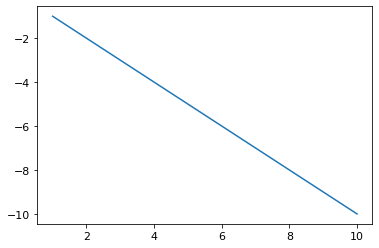

In [187]:
import ltspice
l = ltspice.Ltspice("circuito sencillo.raw")
l.parse()
time = l.get_time()
V1 = l.get_data('V(1)')
plt.plot(time, V1)

** En resumen: ** hemos usado dos *compiladores* Spice distintos para hacer el mismo ejercicio. De igual manera podríamos haber usado [Ngspice](http://ngspice.sourceforge.net) u otro. De hecho, podíamos haber usado Ahkab en modo comando. Si tenemos correctamente instalado este framework, en princpio podemos invocarlo [directamente desde línea de comandos](https://ahkab.readthedocs.io/en/latest/help/Command-Line-Help.html):

In [188]:
!ahkab "circuito sencillo.sp"

2021-01-06 20:29:21
ahkab v. 0.18 (c) 2006-2015 Giuseppe Venturini

Operating Point (OP) analysis

Netlist: circuito sencillo.sp
Title: * este es un circuito sencillo
At 300.00 K
Options:
	vea = 1.000000e-06
	ver = 0.001000
	iea = 1.000000e-09
	ier = 0.001000
	gmin = 0.000000e+00

Convergence reached in 2 iterations.

RESULTS:

Variable    Units      Value        Error    %
----------  -------  -------  -----------  ---
V1          V          -9     9.00001e-12    0
I(V1)       A          -0.09  0              0
W: Locale appears not set! please export LANG="en_US.UTF-8" or equivalent, 
W: or ahkab's unicode support is broken.

ELEMENTS OP INFORMATION:

Part ID      R [Ω]    V(n1,n2) [V]    I(n1->n2) [A]    P [W]
---------  -------  --------------  ---------------  -------
R1             100              -9            -0.09     0.81

Part ID      V(n1,n2) [V]    I(n1->n2) [A]    P [W]
---------  --------------  ---------------  -------
V1                      9            -0.09    -0.8

**Ejercicio premium**: Graficar los datos anteriores con [Gnuplot](http://www.gnuplot.info). 

 ## Análisis de circuito con resistencias en serie

Vamos a resolver (en punto de operación) el siguiente circuito:

![](https://raw.githubusercontent.com/pammacdotnet/spicelab/master/resistencias%20en%20serie.svg?sanitize=true)

Al igual que antes, grabamos el netlist en disco desde Jupyter gracias a la *palabra mágica* [`%writefile`](https://ipython.readthedocs.io/en/stable/interactive/magics.html#cellmagic-writefile). 

In [189]:
%%writefile "resistencias en serie.net"
* circuito con tres resistencias en serie
v1 1 0 type=vdc vdc=9
R1 0 2 3k
R2 2 3 10k  
R3 3 1 5k
* análisis del circuito
.op
.end

Overwriting resistencias en serie.net


In [190]:
circuito_y_análisis = ahkab.netlist_parser.parse_circuit('resistencias en serie.net')
circuito = circuito_y_análisis[0]       
análisis_en_netlist = circuito_y_análisis[1]
lista_de_análisis = ahkab.netlist_parser.parse_analysis(circuito, análisis_en_netlist)
resultados = ahkab.run(circuito, lista_de_análisis)

Starting op analysis:
Calculating guess: skipped. (linear circuit)
Solving...   done.
Solving...   done.
Difference check within margins.
(Voltage: er=0.001, ea=1e-06, Current: er=0.001, ea=1e-09)


Imprimos los resultados del análisis `.op`:

In [191]:
print(resultados['op'])

OP simulation results for '* circuito con tres resistencias en serie'(netlist resistencias en serie.net).
Run on 2021-01-06 20:29:29, data file None.
Variable    Units      Value     Error    %
----------  -------  -------  --------  ---
V1          V         9       -9e-12      0
V2          V         1.5     -1.5e-12    0
V3          V         6.5     -6.5e-12    0
I(V1)       A        -0.0005   0          0


Los cantidades `V1`, `V2` y `V3` hacen referencia a los distintos valores del potencial que se ha perdido en cada uno de los bornes que has elegido para describir el netlist (`1`, `2`, etc.). Por ejemplo, podemos calcular el *potencial consumido* por la resistencia `R1` y verás que coincide con el del punto `V2` devuelto por Ahkab. **Ejercicio**: compruébalo tú mismo y refléjalo por escrito.

Cargamos primero todo lo relacionado con Sympy:

In [192]:
from sympy.physics.units import ohms, amperes, volts
from sympy.physics.units import convert_to

In [193]:
r1 = 3E3*ohms
intensidad_ahkab = resultados['op']['I(V1)'][0][0]*amperes
v2 = convert_to(intensidad_ahkab*r1, [volts])
v2

-1.5*volt

 > **Pregunta**: reproduce el resto de los valores anteriores de manera *manual* mediante Sympy (es decir, aplicando la ley de Ohm, pero con un *toque computacional*). Te pongo aquí un ejemplo del que puedes partir… En él sólo calculo la corriente que circula por el circuito (sí, justo la que antes Ahkab ha devuelto de manera automática). Para ello necesito previamente computar la resistencia total (`r_total`). Faltarían el resto de resultados y convertirlos a unidades más *vistosas* (mediante la orden `convert_to` y `.n()`).

In [194]:
from sympy.physics.units import kilo
from sympy import solve, symbols, Eq
v1 = 9*volts
r1 = 3*kilo*ohms
r2 = 10*kilo*ohms
r3 = 5*kilo*ohms
r_total = r1 + r2 + r3
intensidad = symbols('i')
ley_ohm = Eq(v1, intensidad*r_total)
solucion_para_intensidad = solve(ley_ohm, intensidad)
intensidad=convert_to(solucion_para_intensidad[0], [amperes]).n(2)
convert_to(solucion_para_intensidad[0], [amperes]).n(2)


0.0005*ampere

In [45]:
r1 = 3*kilo*ohms
ley_ohm_r1 = Eq(v2,intensidad*r1)
solucion_r1= solve(ley_ohm_r1,v2)
v_r1 = convert_to(solucion_r1[0], [volts]).n(2)
v_r1



1.5*volt

In [50]:
r2 = 10*kilo*ohms
ley_ohm_r2 = Eq(v3,intensidad*r2)
solucion_r2= solve(ley_ohm_r2,v3)
v_r2 = convert_to(solucion_r2[0], [volts]).n(2)
v_r2


5.0*volt

In [49]:
r3 = 5*kilo*ohms
ley_ohm_r3 = Eq(v4,intensidad*r3)
solucion_r3= solve(ley_ohm_r3,v4)
v_r3 = convert_to(solucion_r3[0], [volts]).n(2)
v_r3


2.5*volt

> **Pregunta**: Demuestra que se cumple la Ley de Kirchhoff de la energía en un circuito, es decir, que la suma de la energía suministrada por las fuentes (pilas) es igual a la consumida por las resistencias. Realiza la operación con Sympy.

$$
\sum_i^N V_{\text{fuentes}} = \sum_j^M V_{\text{consumido en resistencias}}
$$

Ten en cuenta que en este caso sólo hay una fuente.

Sabemos que hay una única pila (fuente de energía) que aporta 9 voltios, y los valores del potencial consumido por las resistencias se han calculado previamente, siendo sus valores 1.5V para el caso de la resistencia 1, 5.0V para la resistencia 2 y 2.5V para la resistencia 3.

In [48]:
v_consumido_resistencias_total = v_r1 + v_r2 + v_r3
v_consumido_resistencias_total

9.0*volt

De esta manera, el sumatorio del total de las fuentes (única pila de 9V) y el sumatorio de los potenciales consumidos por las resistencias (calculado en el punto previo) se iguala, cumpliendo así la Ley de Kirchhoff de la energía en un circuito

$$
\sum_i^N V_{\text{fuentes}} = \sum_j^M V_{\text{consumido en resistencias}}
$$
$$
\sum_i^N 9V = \sum_j^M 9V
$$

## Análisis `.op` de circuitos con resistencias en paralelo

Vamos a complicar un poco el trabajo añadiendo elementos en paralelo.

 > **Pregunta**: realiza los análisis `.op` de los siguientes circuitos.
 Para ello crea un netlist separado para cada uno donde queden correctamente descritos
 junto con la simulación (`.op`). Comenta los resultados que devuelve Ahkab (no imprimas los resultados de las simulaciones *sin más*).

 ![](https://raw.githubusercontent.com/pammacdotnet/spicelab/master/resistencias%20en%20paralelo.svg?sanitize=true)

 Aquí tienes el análisis del primer circuito, para que sirva de ejemplo:

## Circuito 1

In [128]:
%%writefile "resistencias en paralelo 1.cir"
* resistencias en paralelo
vdd 0 1 vdc=12 type=vdc
vdummy 2 5 vdc=0 type=vdc
vdummy2 3 4 vdc=0 type=vdc
r2 1 2 1k
r3 2 3 220
r4 4 0 1.5k
r5 5 0 470
.op
.end

Overwriting resistencias en paralelo 1.cir


In [129]:
circuito_y_análisis = ahkab.netlist_parser.parse_circuit('resistencias en paralelo 1.cir')
circuito = circuito_y_análisis[0]       
análisis_en_netlist = circuito_y_análisis[1]
lista_de_análisis = ahkab.netlist_parser.parse_analysis(circuito, análisis_en_netlist)
resultados = ahkab.run(circuito, lista_de_análisis)

Starting op analysis:
Calculating guess: skipped. (linear circuit)
Solving...   done.
Solving...   done.
Difference check within margins.
(Voltage: er=0.001, ea=1e-06, Current: er=0.001, ea=1e-09)


Imprimimos los resultados del análisis `.op`. Como puedes comprobar, Ahkab sólo reporta la intensidad de corriente en las ramas en las que hay una pila (en este caso, la rama donde está la pila `VDD`).

In [130]:
print(resultados['op'])

OP simulation results for '* resistencias en paralelo'(netlist resistencias en paralelo 1.cir).
Run on 2021-01-06 18:55:12, data file None.
Variable    Units           Value        Error    %
----------  -------  ------------  -----------  ---
V1          V        -12           1.2e-11        0
V2          V         -3.23533     3.23533e-12    0
V5          V         -3.23533     3.23533e-12    0
V3          V         -2.8215      2.82151e-12    0
V4          V         -2.8215      2.82151e-12    0
I(VDD)      A         -0.00876467  0              0
I(VDUMMY)   A         -0.00688367  0              0
I(VDUMMY2)  A         -0.001881    0              0


> **Pregunta:** inserta dos *pilas virtuales* de 0 voltios en el resto de ramas del circuito (`Vdummy1` en la rama donde está `R5` y `Vdummy2` en la rama donde está `R3` y `R4`) para que Ahkab nos imprima también la corriente en las mismas. Es muy parecido al tercer circuito que tienes que resolver, donde `V1`, `V2` y `V3` tienen cero voltios. Estas *pilas nulas* son, a todos los efectos, *simples cables*. Una vez que ya tienes las corrientes en todas las ramas, comprueba que se cumple la Ley de Kirchhoff para las corrientes:

$$
I_{\text{entrante}} = \sum_i^{N} I_{\text{salientes}}
$$

Repite lo mismo para los otros dos circuitos. Realiza además los cálculos con Sympy (recalcula los mismos voltajes que devuelve Ahkab a partir de la corriente que sí te devuelve la simulación) y cuidando de no olvidar las unidades. Recuerda que el objeto `resultados` alberga toda la información que necesitas de manera indexada. Ya han aparecido un ejemplo más arriba. Es decir: no *copies* los números *a mano*, trabaja de manera informáticamente elegante (usando la variable `resultados`). 

En este primer circuito los resultados del análisis `.op` nos muestran en la variable `V1` el potencial establecido en el netlist que proviene de la pila (12 voltios) y en el resto de variables `VN` los potenciales consumidos por las resistencias.En el caso de las variables que reflejan la intensidad, en primer lugar Ahkab nos muestra la corriente de la rama inicial donde se encuentra la pila (I(VDD)) y dado que tras la primera resistencia, el circuito se divide en dos ramas, se han ubicado en ambas dos pilas "falsas" de 0 voltios para poder ver la intensidad de corriente en cada rama, cuya suma es igual a la intensidad que se encontraba en la rama inicial.

### Ley de Kirchhoff

In [67]:
intensidad_entrante = resultados['op']['I(VDD)'][0][0]*amperes
print("Siendo la intensidad entrante igual a: ",intensidad_entrante,". Observamos que efectivamente el sumatorio de las dos intensidades salientes da el mismo resultado: ")
resultados['op']['I(VDUMMY)'][0][0]*amperes+resultados['op']['I(VDUMMY2)'][0][0]*amperes

Siendo la intensidad entrante igual a:  -0.00876467449306297*ampere . Observamos que efectivamente el sumatorio de las dos intensidades salientes da el mismo resultado: 


-0.00876467449306297*ampere

## Circuito 2

### Circuito 2 - Spice

In [118]:
%%writefile "resistencias en paralelo 2.cir"
* resistencias en paralelo
v1 0 1 vdc=9 type=vdc
v2 5 0 vdc=1.5 type=vdc
vdummy 2 6 vdc=0 type=vdc
vdummy2 3 7 vdc=0 type=vdc
r1 1 2 47
r2 2 3 220
r3 6 5 180
r4 7 4 1K
r5 4 0 560
.op
.end

Overwriting resistencias en paralelo 2.cir


In [119]:
circuito_y_análisis_2 = ahkab.netlist_parser.parse_circuit('resistencias en paralelo 2.cir')
circuito_2 = circuito_y_análisis_2[0]       
análisis_en_netlist_2 = circuito_y_análisis_2[1]
lista_de_análisis_2 = ahkab.netlist_parser.parse_analysis(circuito_2, análisis_en_netlist_2)
resultados_2 = ahkab.run(circuito_2, lista_de_análisis_2)

Starting op analysis:
Calculating guess: skipped. (linear circuit)
Solving...   done.
Solving...   done.
Difference check within margins.
(Voltage: er=0.001, ea=1e-06, Current: er=0.001, ea=1e-09)


In [120]:
print(resultados_2['op'])

OP simulation results for '* resistencias en paralelo'(netlist resistencias en paralelo 2.cir).
Run on 2021-01-06 16:09:29, data file None.
Variable    Units          Value         Error    %
----------  -------  -----------  ------------  ---
V1          V        -9            8.99997e-12    0
V5          V         1.5         -1.5e-12        0
V2          V        -6.686        6.68599e-12    0
V6          V        -6.686        6.686e-12      0
V3          V        -5.85964      5.85965e-12    0
V7          V        -5.85964      5.85964e-12    0
V4          V        -2.10346      2.10346e-12    0
I(V1)       A        -0.049234     0              0
I(V2)       A        -0.0454778    0              0
I(VDUMMY)   A        -0.0454778    0              0
I(VDUMMY2)  A        -0.00375618   0              0


En este primer circuito los resultados del análisis `.op` nos muestran en la variable `V1` el potencial establecido en el netlist que proviene de la pila (12 voltios) y en el resto de variables `VN` los potenciales consumidos por las resistencias. Observamos por otro lugar las intensidades que comienza siendo el valor mostrado para `I(V1)` y gracias a las pilas "falsas" `VDUMMY1` y `VDUMMY2` podemos ver la intensidad de corriente en los ramales en los que se divide el circuito `I(VDUMMY1)` y `I(VDUMMY2)`

### Ley de Kirchhoff

In [124]:
intensidad_entrante = resultados_2['op']['I(V1)'][0][0]*amperes
print("Siendo la intensidad entrante igual a: ",intensidad_entrante,". Observamos que efectivamente el sumatorio de las dos intensidades salientes da el mismo resultado: ")
resultados_2['op']['I(VDUMMY)'][0][0]*amperes+resultados_2['op']['I(VDUMMY2)'][0][0]*amperes

Siendo la intensidad entrante igual a:  -0.0492339765344711*ampere . Observamos que efectivamente el sumatorio de las dos intensidades salientes da el mismo resultado: 


-0.0492339765344711*ampere

## Circuito 3

In [69]:
%%writefile "resistencias en paralelo 3.cir"
* resistencias en paralelo
v1 0 1 vdc=9 type=vdc
v2 1 2 vdc=0 type=vdc
v3 1 3 vdc=0 type=vdc
v4 1 4 vdc=0 type=vdc
r1 2 0 10k
r2 3 0 2k
r3 4 0 1k
.op
.end

Overwriting resistencias en paralelo 3.cir


In [70]:
circuito_y_análisis_3 = ahkab.netlist_parser.parse_circuit('resistencias en paralelo 3.cir')
circuito_3 = circuito_y_análisis_3[0]       
análisis_en_netlist_3 = circuito_y_análisis_3[1]
lista_de_análisis_3 = ahkab.netlist_parser.parse_analysis(circuito_3, análisis_en_netlist_3)
resultados_3 = ahkab.run(circuito_3, lista_de_análisis_3)

Starting op analysis:
Calculating guess: skipped. (linear circuit)
Solving...   done.
Solving...   done.
Difference check within margins.
(Voltage: er=0.001, ea=1e-06, Current: er=0.001, ea=1e-09)


In [71]:
print(resultados_3['op'])

OP simulation results for '* resistencias en paralelo'(netlist resistencias en paralelo 3.cir).
Run on 2020-12-28 14:28:17, data file None.
Variable    Units      Value    Error    %
----------  -------  -------  -------  ---
V1          V        -9         9e-12    0
V2          V        -9         9e-12    0
V3          V        -9         9e-12    0
V4          V        -9         9e-12    0
I(V1)       A        -0.0144    0        0
I(V2)       A        -0.0009    0        0
I(V3)       A        -0.0045    0        0
I(V4)       A        -0.009     0        0


En el tercer circuito con los resultados del análisis `.op` vemos la variable `V1` con potencial establecido en el netlist de la primera pila (9 voltios) y en el resto de variables `VN` los potenciales que circulan por las diferentes pilas del circuito en paralelo, en los 3 casos igual al de la pila de inicio al ser voltaje proviniente de ella. Para las variables de la intensidad, vemos inicialmente en `I(V1)` la corriente existente en el circuito en un primer lugar, y que posteriormente de encuentra con tres ramales dividiéndose así esa intensidad primera entre los tres `I(V2)`, `I(V3)`, `I(V4)`.

### Ley de Kirchhoff

In [77]:
intensidad_entrante = resultados_3['op']['I(V1)'][0][0]*amperes
print("Siendo la intensidad entrante igual a: ",intensidad_entrante,". Observamos que efectivamente el sumatorio de las dos intensidades salientes da el mismo resultado: ")
resultados_3['op']['I(V2)'][0][0]*amperes+resultados_3['op']['I(V3)'][0][0]*amperes+resultados_3['op']['I(V4)'][0][0]*amperes

Siendo la intensidad entrante igual a:  -0.0144*ampere . Observamos que efectivamente el sumatorio de las dos intensidades salientes da el mismo resultado: 


-0.0144*ampere

 # Circuitos en DC que evolucionan con el tiempo

 ## Carga de un condensador
 Vamos a ver qué le pasa a un circuito de corriente continua cuando tiene un condensador
 en serie.

 ![](https://raw.githubusercontent.com/pammacdotnet/spicelab/master/condensador%20en%20continua.svg?sanitize=true)

 Al igual que antes, primero guardamos el circuito en un netlist externo:

In [195]:
%%writefile "condensador en continua.ckt"
* Carga condensador
v1 0 1 type=vdc vdc=6
r1 1 2 1k
c1 2 0 1m ic=0
.op
.tran tstep=0.1 tstop=8 uic=0
.end

Overwriting condensador en continua.ckt


> **Pregunta:** ¿qué significa el parámetro `ic=0`? ¿qué perseguimos con un análisis de tipo `.tran`?

El parámetro ic sirve para indicar las condiciones iniciales de carga del dispositivo, generalmente condensadores y para análisis de tipo .tran. En este tipo de análisis se busca simular un reloj que en cada monento establecido en los parámetros del netlist el programa realice un análisis .op en cada momento del tiempo.

Leamos el circuito:

In [196]:
circuito_y_análisis = ahkab.netlist_parser.parse_circuit("condensador en continua.ckt")

 Separamos el netlist de los análisis y asignamos un fichero de almacenamiento de datos (`outfile`):

In [197]:
circuito = circuito_y_análisis[0]
análisis_en_netlist = circuito_y_análisis[1]
lista_de_análisis = ahkab.netlist_parser.parse_analysis(circuito, análisis_en_netlist)
lista_de_análisis[1]['outfile'] = "simulación tran.tsv"

 Ejecutamos la simulación:

In [198]:
resultados = ahkab.run(circuito, lista_de_análisis)
print(resultados['op'])
#print(resultados['tran'].keys())

Starting op analysis:
Calculating guess: skipped. (linear circuit)
Solving...   done.
Solving...   done.
Difference check within margins.
(Voltage: er=0.001, ea=1e-06, Current: er=0.001, ea=1e-09)
Starting transient analysis: 
Selected method: TRAP
Solving...  done.
Average time step: 0.0869565
OP simulation results for '* carga condensador'(netlist condensador en continua.ckt).
Run on 2021-01-06 20:30:26, data file None.
Variable    Units      Value    Error    %
----------  -------  -------  -------  ---
V1          V             -6    6e-12    0
V2          V             -6    6e-12    0
I(V1)       A              0    0        0


 Dibujamos la gráfica de carga del condensador con el tiempo, centrándonos en la intensidad que circula por la pila. 

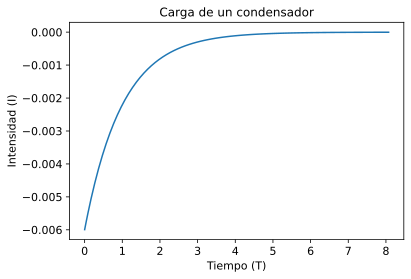

In [199]:
from IPython.display import set_matplotlib_formats

set_matplotlib_formats('svg')

figura = plt.figure()
plt.title("Carga de un condensador")
plt.xlabel("Tiempo (T)")
plt.ylabel("Intensidad (I)")
plt.plot(resultados['tran']['T'], resultados['tran']['I(V1)'], label="Una etiqueta")

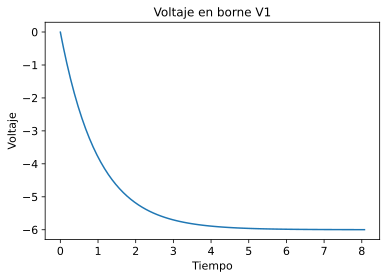

In [15]:
figura2 = plt.figure()
plt.title("Voltaje en borne V1")
plt.xlabel("Tiempo (T)")
plt.ylabel("Voltaje (V)")
plt.plot(resultados['tran']['T'], resultados['tran']['V2'], label="Otra etiqueta")

> **Pregunta:** Etiqueta los ejes convenientemente y comenta la gráfica. Dibuja otra gráfica con el voltaje en el borne `V1`. ¿Por qué son *opuestas*? ¿Qué le ocurre al voltaje a medida que evoluciona el circuito en el tiempo? Dibuja las gráficas en un formato estándar de representación vectorial (SVG, por ejemplo). Algo de ayuda [aquí](https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html#IPython.display.set_matplotlib_formats). ¿Qué valores devuelve el análisis de tipo `.op`? Justifícalo.

En las gráficas anteriores a se observa como la intensidad de corriente que circula inicialmente por el circuito es muy alta, pero a media que la corriente llega al condensador, este se carga y aumenta la misma en su interior almacenándola, por lo que la corriente disminuye, reflejando así gráficamente la función una curva tan pronunciada. Por otro lado, en la segunda gráfica vemos cómo la función de la evolución del voltaje en el borne `V1` en el tiempo refleja una curva opuesta a la de la gráfica anterior, a medida que el circuito evoluciona en el tiempo el voltaje en el condensador se acumula y pasa de una carga inicial muy rápida y alta, a ritmos más lentos según nos acercamos a la acumulación total posible. 

## Carrera de condensadores

Ahora tenemos un circuito con dos condensadores en paralelo: 

![](https://raw.githubusercontent.com/pammacdotnet/spicelab/master/condensadores%20en%20paralelo.svg?sanitize=true)

> **Pregunta:** Crea el netlist de este circuito e identifica qué condensador se satura primero. Dibuja la evolución de la intensidad en ambas ramas de manera simultánea. [Aquí](https://matplotlib.org/gallery/api/two_scales.html) tienes un ejemplo de cómo se hace esto en Matplotlib. Recuerda que para que Ahkab nos devuelva la corriente en una rama, debe de estar presente una pila. Si es necesario, inserta pilas virtuales de valor nulo (cero voltios), tal y como hemos comentado antes. Grafica también los voltajes (en otra gráfica, pero que aparezcan juntos). 

In [200]:
%%writefile "carrera en condensadores.ckt"
* Carga condensador
v0 0 1 type=vdc vdc=10
r1 0 2 3k
c1 2 3 47u ic=0
v1dummy 3 1 type=vdc vdc=0
c2 2 4 22u ic=0
v2dummy 4 1 type=vdc vdc=0
.tran tstep=0.01 tstart=6.5 tstop=7.5 uic=0
.end

Overwriting carrera en condensadores.ckt


In [201]:
circuito_y_análisis = ahkab.netlist_parser.parse_circuit("carrera en condensadores.ckt")
circuito = circuito_y_análisis[0]       
análisis_en_netlist = circuito_y_análisis[1]
lista_de_análisis = ahkab.netlist_parser.parse_analysis(circuito, análisis_en_netlist)
lista_de_análisis[0]['outfile'] = "simulación tran carrera condensadores.tsv"
resultados = ahkab.run(circuito, lista_de_análisis)


Starting transient analysis: 
Selected method: TRAP
Solving...  done.
Average time step: 0.00900901


Procedemos a dibujar las gráficas de la evolución de la intensidad en ambas ramas y de los voltajes. Visualizándolas en formato estándar de representación vectorial (SVG) establecido previamente, formato que se mantendrá para las gráficas que restan por mostrarse en este documento.

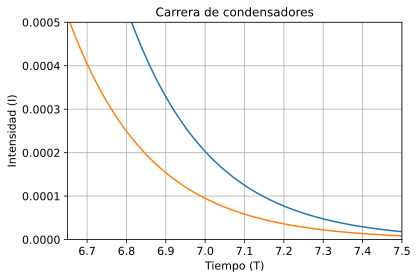

In [202]:
figura = plt.figure()
plt.title("Carrera de condensadores")
plt.xlim(6.65, 7.5)
plt.ylim(0.0, 0.0005)
plt.grid()
plt.xlabel("Tiempo (T)")
plt.ylabel("Intensidad (I)")
plt.plot(resultados['tran']['T'], resultados['tran']['I(V1DUMMY)'],label="Intensidad en C1")
plt.plot(resultados['tran']['T'], resultados['tran']['I(V2DUMMY)'],label="Intensidad en C2")

En esta gráfica se puede ver la evolución de la intensidad de corriente en ambos ramales del circuito donde se encuentran cada uno de los condensadores, y en la que la línea azul representa la evolución en el tiempo del condensador `c1` y la línea naranja es el condensador `c2`. Tomando como referencia el eje de abscisas establecido con los valores del tiempo, se observa que el condensador `c1` en el tramo de tiempo comprendido entre 7.0 - 7.3 su intensidad en la gráfica va entre 0.0002 - 0.00005 amperios (este último dato estimado dado que se encuentra en un punto intermedio entre 0.0001 y 0.0000), por lo que a penas es 0.00015 la diferencia de intensidad en ese tramo del tiempo. Para un mismo rango de tiempo de 0.3s en el condensador `c2` entre los tiempos 6.7 - 7.0 la intensidad va entre 0.0004 - 0.0001 amperios, lo que hace una diferencia de intensidad de 0.0003 amperios y por lo tanto mayor rapidez en su evolución. Es por esto que en la carrera de condensadores "gana" el condensador `c2`

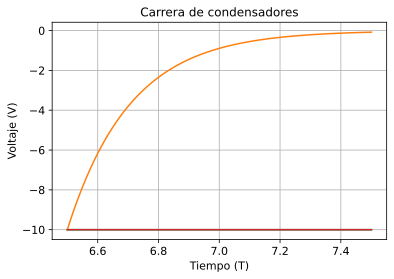

In [203]:
figura = plt.figure()
plt.title("Carrera de condensadores")
plt.grid()
plt.xlabel("Tiempo (T)")
plt.ylabel("Voltaje (V)")
plt.plot(resultados['tran']['T'], resultados['tran']['V1'],label="Intensidad en V1")
plt.plot(resultados['tran']['T'], resultados['tran']['V2'],label="Intensidad en V2")
plt.plot(resultados['tran']['T'], resultados['tran']['V3'],label="Intensidad en V3")
plt.plot(resultados['tran']['T'], resultados['tran']['V4'],label="Intensidad en V4")

## Circuitos en corriente alterna

** Ejercicio **: Simula este circuito con LTspice y representa el voltaje y la intensidad en función del tiempo. Traduce este ejercicio a la versión Spice de Akhab y haz la misma representación.

### Versión LTspice

In [ ]:
%%writefile "corriente alterna.net"
* Circuito en corriente alterna
v1 1 0 sin(0 120 60 0 0)
r1 0 1 10k
.tran 1
.end

In [130]:
lts "corriente alterna.net"

In [131]:
%pycat circuito sencillo.log

Circuit: * Este es un circuito sencillo adaptado para LTspice


Date: Tue Dec 29 11:22:03 2020
Total elapsed time: 0.010 seconds.

tnom = 27
temp = 27
method = trap
totiter = 2003
traniter = 0
tranpoints = 0
accept = 0
rejected = 0
matrix size = 2
fillins = 0
solver = Normal
Matrix Compiler1:       2 opcodes  0.0/[0.0]/0.0
Matrix Compiler2: off  [0.0]/0.0/0.0


Text(0, 0.5, 'Voltaje (V)')

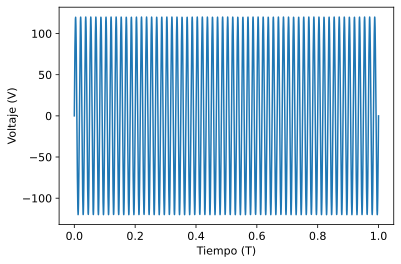

In [204]:
import ltspice
l = ltspice.Ltspice("corriente alterna.raw")
l.parse()
time = l.get_time()
V1 = l.get_data('V(1)')
plt.plot(time, V1)
plt.xlabel("Tiempo (T)")
plt.ylabel("Voltaje (V)")

Text(0, 0.5, 'Intensidad (I)')

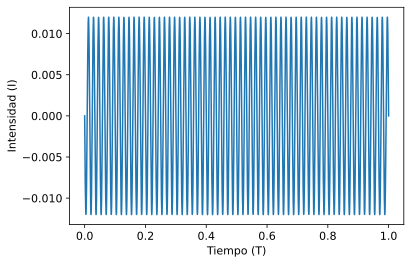

In [205]:
import ltspice
l = ltspice.Ltspice("corriente alterna.raw")
l.parse()
time = l.get_time()
V1 = l.get_data('I(V1)')
plt.plot(time, V1)
plt.xlabel("Tiempo (T)")
plt.ylabel("Intensidad (I)")

### Versión Ahkab

In [80]:
%%writefile "corriente alterna ahkab.ckt"
* Circuito en corriente alterna
v1 1 0 vdc=0 type=sin VO=0 VA=120 FREQ=60 TD=0 THETA=0
r1 0 1 10k
.tran  tstep=0.01 tstop=1 
.end

Overwriting corriente alterna ahkab.ckt


In [81]:
circuito_y_análisis = ahkab.netlist_parser.parse_circuit("corriente alterna ahkab.ckt")
circuito = circuito_y_análisis[0]       
análisis_en_netlist = circuito_y_análisis[1]
lista_de_análisis = ahkab.netlist_parser.parse_analysis(circuito, análisis_en_netlist)
lista_de_análisis[0]['outfile'] = "simulación tran corriente alterna.tsv"
resultados = ahkab.run(circuito, lista_de_análisis)

Starting transient analysis: 
Selected method: TRAP
Solving...  done.
Average time step: 0.00049975


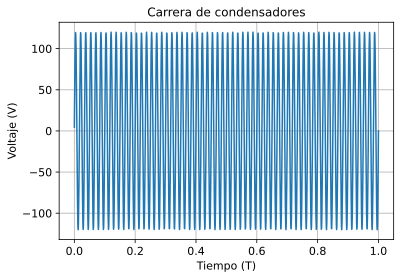

In [82]:
figura = plt.figure()
plt.title("Carrera de condensadores")
plt.grid()
plt.xlabel("Tiempo (T)")
plt.ylabel("Voltaje (V)")
plt.plot(resultados['tran']['T'], resultados['tran']['V1'],label="Intensidad en V1")

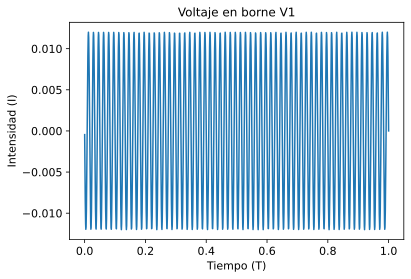

In [83]:
figura = plt.figure()
plt.title("Voltaje en borne V1")
plt.xlabel("Tiempo (T)")
plt.ylabel("Intensidad (I)")
plt.plot(resultados['tran']['T'], resultados['tran']['I(V1)'], label="Otra etiqueta")

Tras la realización de dos simulaciones del mismo circuito usando en cada una un intérprete diferente (primeramente Ltspice y a continuación Ahkab) se puede observar la obtención de gráficas iguales para el voltaje y la intensidad en función del tiempo. 
La primera gráfica en ambas simulaciones representa el voltaje y describe un tipo de onda senoidal, la cual es periódica, con una amplitud de 120 voltios. El tipo de onda senoidal representa los electrones que van y vienen en corriente alterna, variando así voltajes y corriente en el tiempo.
En la segunda gráfica de los dos intérpretes se refleja la intensidad y su variación en el tiempo, la cual refleja una onda senoidal de la misma manera que el voltaje, pero con oscilaciones cuyos valores sin positivos o negativos de manera inversa al voltaje según la dirección de los electrones en cada momento.


# Resumen de lo que se pide
Volved a realizar todos los ejercicios y demos en vuestro propio notebook, explicando con vuestras palabras cada paso, cada gráfica y respondiendo a cada pregunta. Cuidad la belleza, coherencia, narración, explicaciones y gráficas.